In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_noZ\Hao_Harmony_test_no_scale.h5ad")
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
print('Original adata:', adata.shape)
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')
# del adata


Original adata: (161764, 33538)
all cell types: ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


## Read features k2

In [4]:
import os
# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\feature_selection_k2")
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/feature_selection_k2')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [5]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
ASDC,45,22
B_intermediate,16,6
B_memory,41,18
B_naive,9,6
CD14_Mono,17,9
CD16_Mono,12,4
CD4_CTL,129,46
CD4_Naive,131,75
CD4_Proliferating,20,13
CD4_TCM,88,48


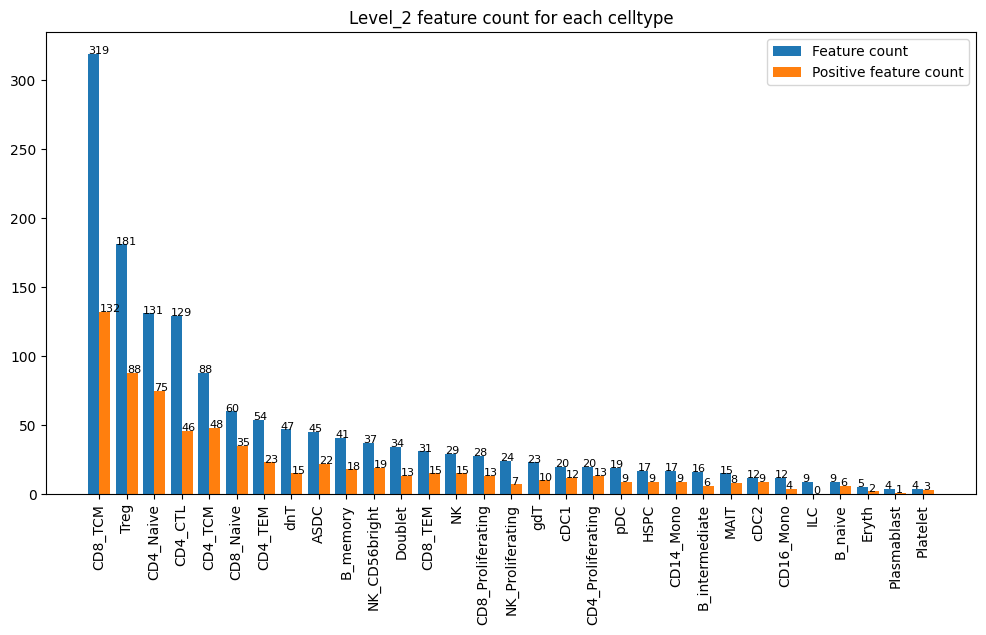

In [6]:
# Sort count_df by 'Feature_count' in descending order
count_df = count_df.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.4, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Level_2 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
counts = adata.obs['celltype.l2'].value_counts()
order = count_df.index.tolist()
counts = counts[order]
counts

celltype.l2
CD8_TCM               2883
Treg                  2507
CD4_Naive            17479
CD4_CTL               1736
CD4_TCM              14889
CD8_Naive            10768
CD4_TEM               4282
dnT                    356
ASDC                    76
B_memory              3285
NK_CD56bright          943
Doublet                605
CD8_TEM              11727
NK                   17173
CD8_Proliferating       91
NK_Proliferating       548
gdT                   3649
cDC1                   151
CD4_Proliferating      108
pDC                    861
HSPC                   329
CD14_Mono            42690
B_intermediate        2431
MAIT                  2784
cDC2                  2501
CD16_Mono             6320
ILC                    132
B_naive               7718
Eryth                   83
Plasmablast            366
Platelet              2293
Name: count, dtype: int64

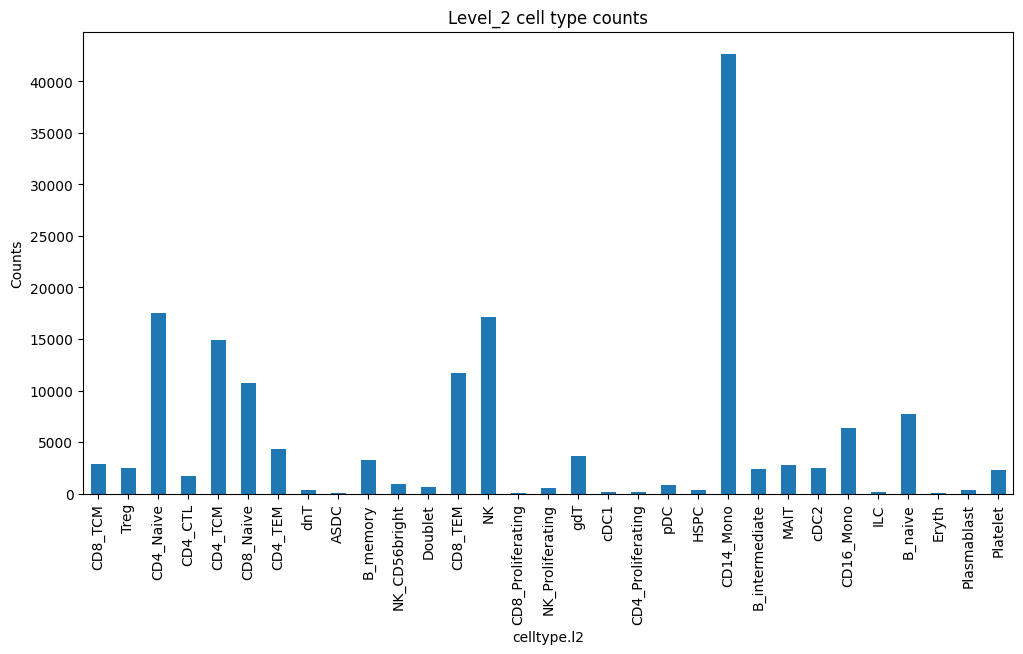

In [8]:
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Level_2 cell type counts')
plt.ylabel('Counts')
plt.show()

## Read features k3

In [9]:
import os
# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\feature_selection_k3")
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/feature_selection_k3')

features_dict_k3 = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict_k3[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [10]:
count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict_k3.keys():
    feature_df_k3 = features_dict_k3[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

,Feature_count,Positive_feature_count
ASDC,47,25
B_intermediate,96,49
B_memory,170,90
B_naive,9,6
CD14_Mono,29,16
CD16_Mono,37,17
CD4_CTL,122,45
CD4_Naive,730,393
CD4_Proliferating,70,35
CD4_TCM,247,133


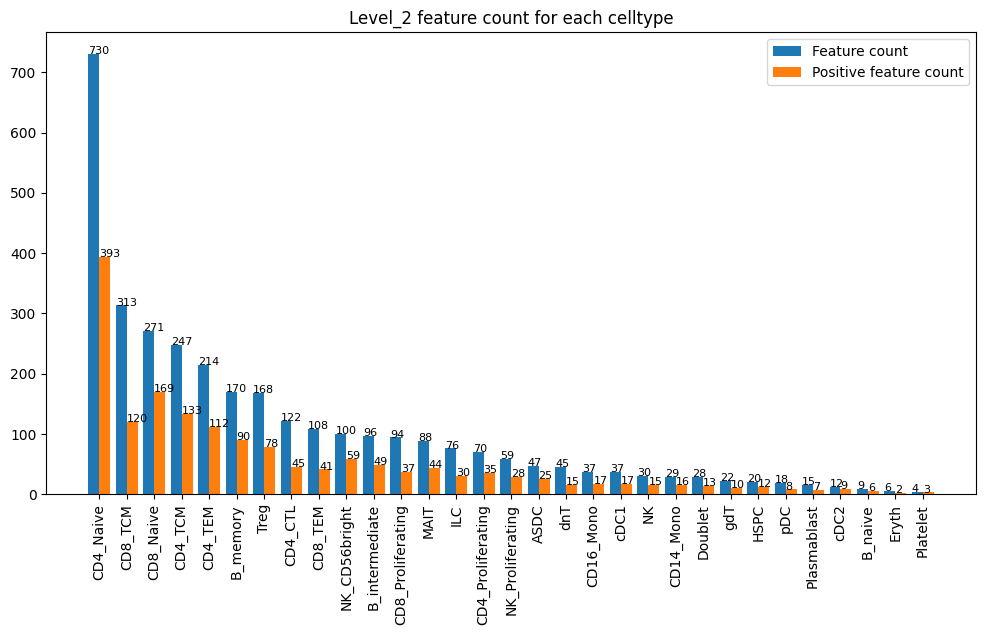

In [11]:
# Sort count_df by 'Feature_count' in descending order
count_df_k3 = count_df_k3.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df_k3.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df_k3['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df_k3['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df_k3['Feature_count']):
    plt.text(i-0.4, v, str(v), fontsize=8)
for i, v in enumerate(count_df_k3['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df_k3.index)
plt.xticks(rotation=90)
plt.title('Level_2 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
counts = adata.obs['celltype.l2'].value_counts()
order = count_df_k3.index.tolist()
counts = counts[order]
counts

celltype.l2
CD4_Naive            17479
CD8_TCM               2883
CD8_Naive            10768
CD4_TCM              14889
CD4_TEM               4282
B_memory              3285
Treg                  2507
CD4_CTL               1736
CD8_TEM              11727
NK_CD56bright          943
B_intermediate        2431
CD8_Proliferating       91
MAIT                  2784
ILC                    132
CD4_Proliferating      108
NK_Proliferating       548
ASDC                    76
dnT                    356
CD16_Mono             6320
cDC1                   151
NK                   17173
CD14_Mono            42690
Doublet                605
gdT                   3649
HSPC                   329
pDC                    861
Plasmablast            366
cDC2                  2501
B_naive               7718
Eryth                   83
Platelet              2293
Name: count, dtype: int64

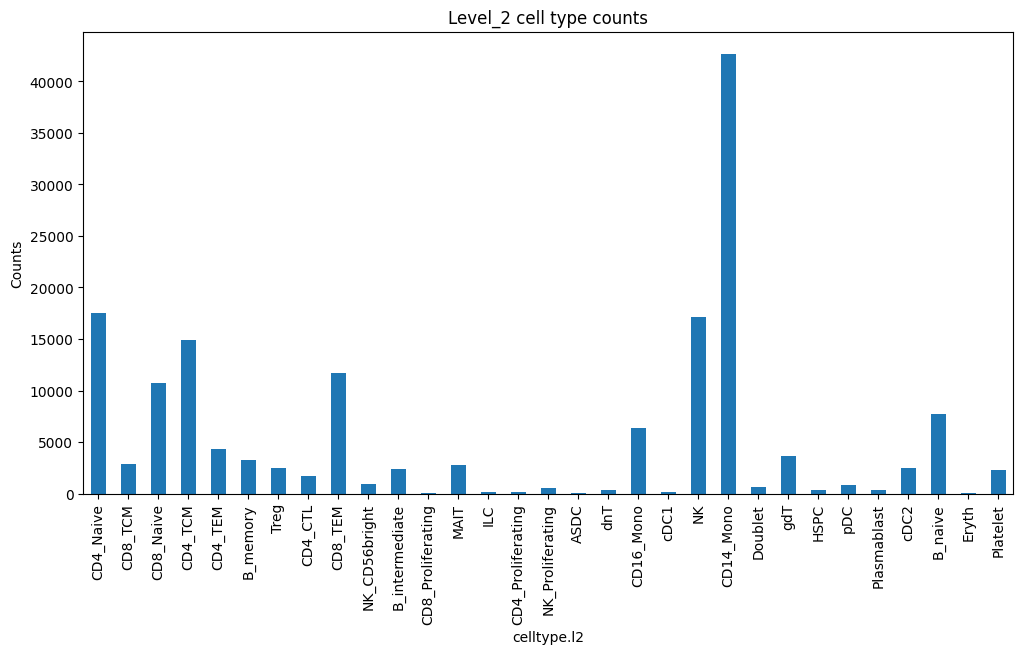

In [13]:
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Level_2 cell type counts')
plt.ylabel('Counts')
plt.show()

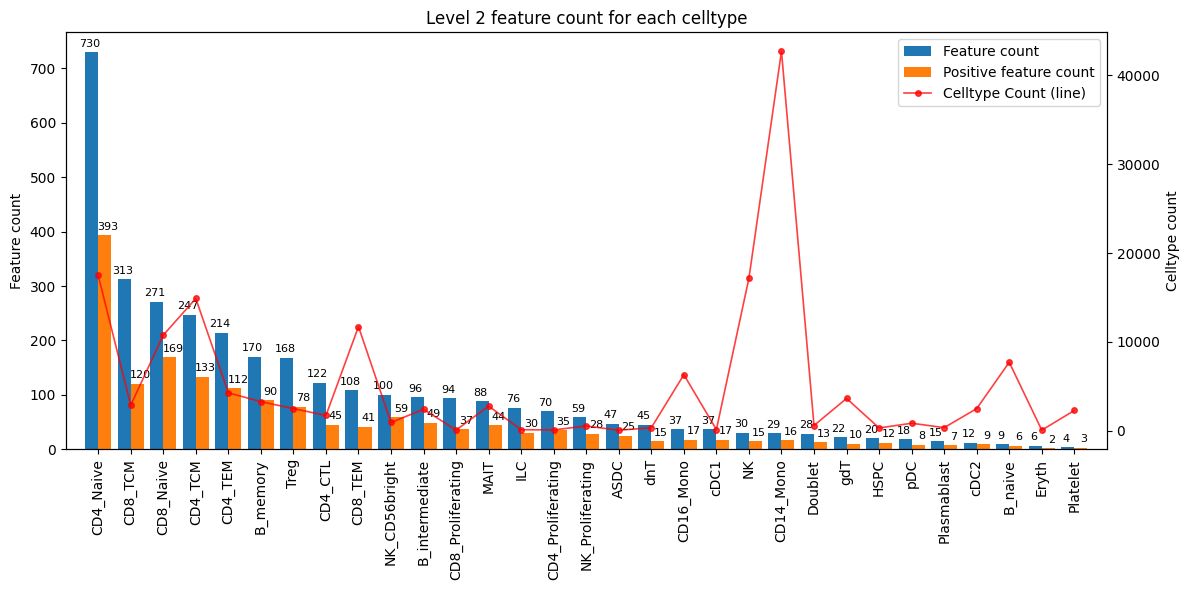

In [14]:
count_df_k3 = count_df_k3.sort_values('Feature_count', ascending=False)
# cell type counts series, align index with count_df
counts_aligned = counts.reindex(count_df_k3.index)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df_k3.index))
bar_width = 0.4

# ax1: Bar plot for feature counts and positive feature counts
ax1.bar(x - bar_width/2, count_df_k3['Feature_count'], bar_width, label='Feature count')
ax1.bar(x + bar_width/2, count_df_k3['Positive_feature_count'], bar_width, label='Positive feature count')
ax1.set_ylabel('Feature count')
ax1.set_xlim(-1, len(count_df_k3.index))

# Add the values to each bar
for i, v in enumerate(count_df_k3['Feature_count']):
    plt.text(i-0.25, v+10, str(v), fontsize=8, ha='center')  # i-0.4
for i, v in enumerate(count_df_k3['Positive_feature_count']):
    plt.text(i+0.3, v+10, str(v), fontsize=8, ha='center')   # i+0

# Add a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(x, counts_aligned, color='red', marker='o', label='Celltype Count (line)', 
         markersize=4, alpha=0.75, linewidth=1.2)
ax2.set_ylabel('Celltype count')

# Customize x-axis and title
ax1.set_xticks(x)
ax1.set_xticklabels(count_df_k3.index, rotation=90)
ax1.set_title('Level 2 feature count for each celltype')

# Combine legends from both axes
handle, labels = ax1.get_legend_handles_labels()
handle2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handle + handle2, labels + labels2, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()